## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247 Winter Quarter 2022, Prof. J.C. Kao, TAs Y. Li, P. Lu, T. Monsoor, T. wang

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

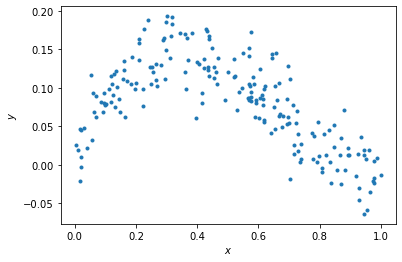

In [3]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) The generating distribution of x is uniform with parameters are a = 0, b = 1. We have used np.random.uniform.

(2) The distribution of the additive noise is Gaussian with mean 0 and stdev 0.03. We have used np.random.normal to generate the same.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [4]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.linalg.inv((xhat)@(xhat.T))@(xhat@(y))

# ================== #
# END YOUR CODE HERE #
# ================== #

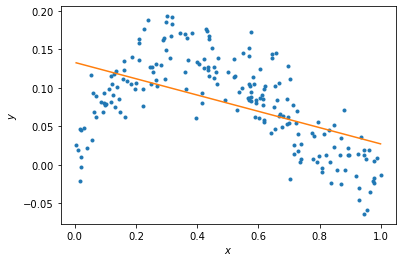

In [5]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model underfits the data. The data seems to resemble higher order polynomial function (such as a parabola), but our linear model has no higher order terms.

(2) We could add more parameters to theta that introduces higher order terms to obtain a better fit. 

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [6]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

xhats.append(xhat)
thetas.append(theta)

for i in np.arange(1,N):
    xhat = np.vstack((x**(i+1), xhat))
    xhats.append(xhat)
    thetas.append(np.linalg.inv((xhats[i])@(xhats[i].T))@(xhats[i]@(y)))
        
# ================== #
# END YOUR CODE HERE #
# ================== #

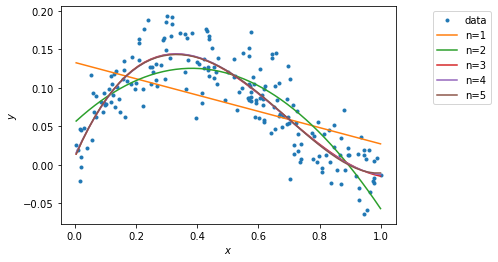

In [7]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5:

$L(\theta) = \frac{1}{2}\sum_{j}(\hat{y}_j - y_j)^2$

In [8]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.

for i in np.arange(N):
    training_errors.append( (0.5) * (np.linalg.norm(y - thetas[i]@(xhats[i]))**2))


# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.2379961088362701, 0.1092492220926853, 0.08169603801105374, 0.08165353735296982, 0.08161479195525295]


### QUESTIONS

(1) Which polynomial model has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The polynomial with order 5 has the best (lowest) training error.

(2) Higher order polynomial functions contains more dimensions to fit the data. Hence, we can adjust the parameters and control the shape of the function and thus make it more fitted.

### Generating new samples and validation error (5 points)

Here, we'll now generate new samples and calculate the validation error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

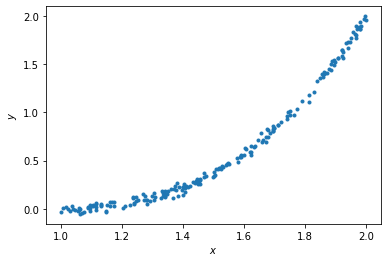

In [9]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [10]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

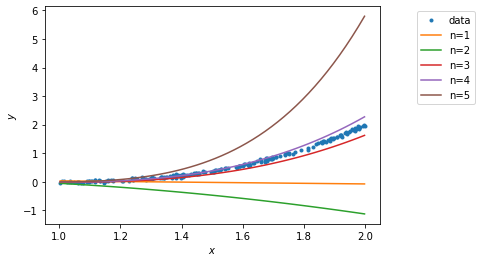

In [11]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [12]:
validation_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable validation_errors, a list of 5 elements,
# where validation_errors[i] are the validation loss for the polynomial fit of order i+1.

for i in np.arange(N):
    validation_errors.append((1/2)* (np.linalg.norm(y - thetas[i]@(xhats[i]))**2))


# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Validation errors are: \n', validation_errors)

Validation errors are: 
 [80.86165184550586, 213.19192445057962, 3.12569710827847, 1.1870765196576454, 214.91021814405832]


### QUESTIONS

(1) Which polynomial model has the best validation error?

(2) Why does the order-5 polynomial model not generalize well?

### ANSWERS

(1) The polynomial with order 4 has the best (lowest) validation error.

(2) Order 5 polynomial models do not generalize well because they overfit the data. It means, the model is too complex and only memorizes the data. Since linear regression "learning" is based on adjust weights the minimize a cost function, a complex higher order function that can memorize the data will do very well in training (since the criteria is loss w/ respect to training data) but will do poorly on data that has not been incorporated into the generalization. Order 4 seems to be sufficiently complex such that it can reasonbly output values from the target distribution without overfitting.